In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import pickle

with open('pkl/y.pkl', 'rb') as file:
    y = pickle.load(file)
with open('pkl/x.pkl', 'rb') as file:
    X = pickle.load(file)

In [3]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size=0.2 , random_state=42)

In [4]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 26)               53        
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                1350      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                        

In [6]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 4s 4ms/step - loss: 873.0953 - root_mean_squared_error: 29.5482 - val_loss: 450.4846 - val_root_mean_squared_error: 21.2246
Epoch 2/50
246/246 [==============================] - 1s 2ms/step - loss: 407.6798 - root_mean_squared_error: 20.1911 - val_loss: 393.9477 - val_root_mean_squared_error: 19.8481
Epoch 3/50
246/246 [==============================] - 1s 2ms/step - loss: 340.2847 - root_mean_squared_error: 18.4468 - val_loss: 332.7890 - val_root_mean_squared_error: 18.2425
Epoch 4/50
246/246 [==============================] - 1s 2ms/step - loss: 301.4357 - root_mean_squared_error: 17.3619 - val_loss: 322.7350 - val_root_mean_squared_error: 17.9648
Epoch 5/50
246/246 [==============================] - 1s 2ms/step - loss: 278.0924 - root_mean_squared_error: 16.6761 - val_loss: 318.5587 - val_root_mean_squared_error: 17.8482
Epoch 6/50
246/246 [==============================] - 1s 3ms/step - loss: 258.8764 - root_mean_squared_error: 

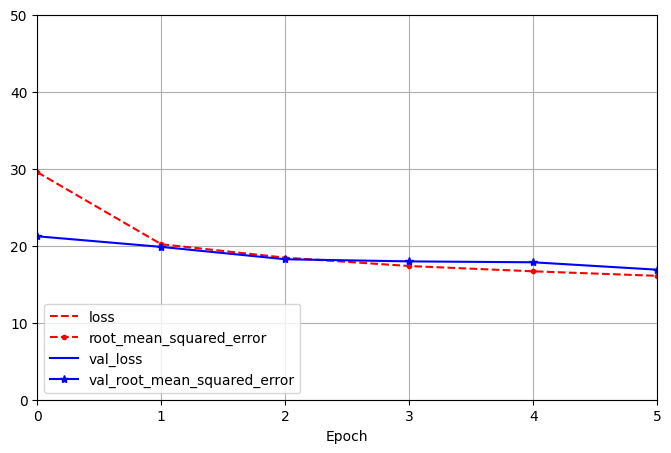

In [7]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [8]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 2s 3ms/step - loss: 71.5056 - root_mean_squared_error: 8.4561 - val_loss: 176.2047 - val_root_mean_squared_error: 13.2742
Epoch 2/50
246/246 [==============================] - 1s 2ms/step - loss: 63.5631 - root_mean_squared_error: 7.9727 - val_loss: 177.4930 - val_root_mean_squared_error: 13.3226
Epoch 3/50
246/246 [==============================] - 1s 2ms/step - loss: 60.6840 - root_mean_squared_error: 7.7900 - val_loss: 178.9443 - val_root_mean_squared_error: 13.3770
Epoch 4/50
246/246 [==============================] - 1s 2ms/step - loss: 59.9641 - root_mean_squared_error: 7.7436 - val_loss: 175.1434 - val_root_mean_squared_error: 13.2342
Epoch 5/50
246/246 [==============================] - 1s 2ms/step - loss: 59.3474 - root_mean_squared_error: 7.7037 - val_loss: 178.3418 - val_root_mean_squared_error: 13.3545
Epoch 6/50
246/246 [==============================] - 1s 2ms/step - loss: 57.9683 - root_mean_squared_error: 7.6137 - va

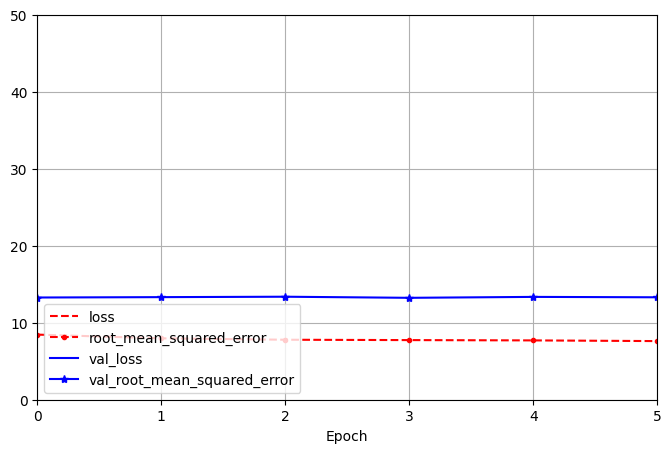

In [9]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [10]:
X_train.shape[1:]

(26,)

In [12]:
tf.random.set_seed(42)
deep_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(50, return_sequences=True),
    tf.keras.layers.SimpleRNN(50, return_sequences=True),
    tf.keras.layers.SimpleRNN(50, return_sequences=True),
    tf.keras.layers.SimpleRNN(50, return_sequences=True),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 26)               53        
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                1350      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                        

In [14]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 3s 3ms/step - loss: 67.7975 - root_mean_squared_error: 8.2339 - val_loss: 195.6952 - val_root_mean_squared_error: 13.9891
Epoch 2/50
246/246 [==============================] - 1s 2ms/step - loss: 71.0572 - root_mean_squared_error: 8.4295 - val_loss: 193.4425 - val_root_mean_squared_error: 13.9084
Epoch 3/50
246/246 [==============================] - 1s 2ms/step - loss: 68.4568 - root_mean_squared_error: 8.2739 - val_loss: 203.4808 - val_root_mean_squared_error: 14.2647
Epoch 4/50
246/246 [==============================] - 1s 2ms/step - loss: 80.8822 - root_mean_squared_error: 8.9935 - val_loss: 187.1994 - val_root_mean_squared_error: 13.6821
Epoch 5/50
246/246 [==============================] - 1s 2ms/step - loss: 70.7716 - root_mean_squared_error: 8.4126 - val_loss: 189.6837 - val_root_mean_squared_error: 13.7726
Epoch 6/50
246/246 [==============================] - 1s 2ms/step - loss: 63.1407 - root_mean_squared_error: 7.9461 - va

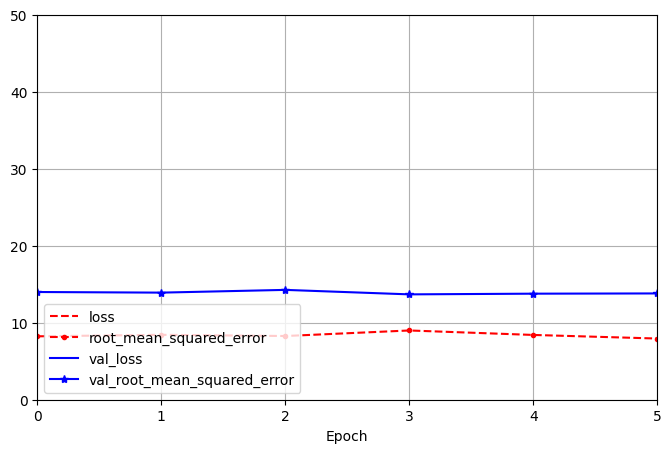

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [16]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 2s 3ms/step - loss: 33.2666 - root_mean_squared_error: 5.7677 - val_loss: 174.7522 - val_root_mean_squared_error: 13.2194
Epoch 2/50
246/246 [==============================] - 0s 2ms/step - loss: 27.9085 - root_mean_squared_error: 5.2829 - val_loss: 178.1323 - val_root_mean_squared_error: 13.3466
Epoch 3/50
246/246 [==============================] - 0s 2ms/step - loss: 26.4670 - root_mean_squared_error: 5.1446 - val_loss: 179.3581 - val_root_mean_squared_error: 13.3925
Epoch 4/50
246/246 [==============================] - 0s 2ms/step - loss: 25.2262 - root_mean_squared_error: 5.0226 - val_loss: 179.9481 - val_root_mean_squared_error: 13.4145
Epoch 5/50
246/246 [==============================] - 0s 2ms/step - loss: 25.1071 - root_mean_squared_error: 5.0107 - val_loss: 182.7887 - val_root_mean_squared_error: 13.5199
Epoch 6/50
246/246 [==============================] - 1s 2ms/step - loss: 24.6283 - root_mean_squared_error: 4.9627 - va

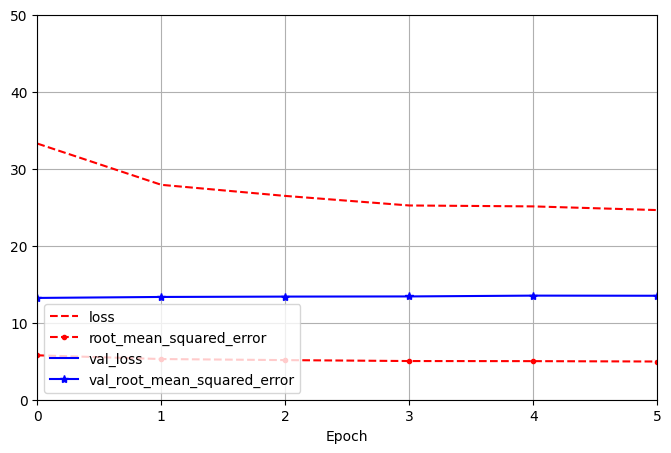

In [18]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()